In [2]:
from typing import Dict, List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
objectives = ["mml_zscore", "pg_basic", "pg_zscore", "mml_basic"]
policies = ["off_policy", "on_policy", "ppo"]
obj_kl_penalties = {
    "mml_zscore": 0.1,
    "pg_basic": 0.6,
    "pg_zscore": 0.6,
    "mml_basic": 0.1
}
sampling_algorithms = ["mixed", "top_p", "beam_search"]
seeds = ["11", "42", "2023", "1993", "12321"]

def cum_mean(arr):
    cum_sum = np.cumsum(arr, axis=0)
    for i in range(cum_sum.shape[0]):       
        if i == 0:
            continue        
        cum_sum[i] =  cum_sum[i] / (i + 1)
    return cum_sum

experiment_results: Dict[str, List[np.array]] = {}
experiment_steps: Dict[str, List[np.array]] = {}
for obj in objectives:
    for pol in policies:
        path = "./predictions-oct-8"
        if pol == "ppo":
            path = f"{path}/ppo-runs"
        for sample_alg in sampling_algorithms:
            experiment_results[f"{obj}_{pol}_{sample_alg}"] = []
            experiment_steps[f"{obj}_{pol}_{sample_alg}"] = []
            for seed in seeds:
                if pol == "ppo":
                    kl_alpha = obj_kl_penalties[obj]
                else:
                    kl_alpha = 0.7
                file = f"{path}/sst2_2_128_all_finetune_{seed}_0.00001_0_1_0_{obj}_{pol}_{sample_alg}_accuracy_{kl_alpha}.csv"
                try:
                    df = pd.read_csv(file)
                    step_arr = df["Step"].tolist()
                    performance_arr = df["Value"].tolist()
                    experiment_steps[f"{obj}_{pol}_{sample_alg}"].append(step_arr[:140])
                    experiment_results[f"{obj}_{pol}_{sample_alg}"].append(performance_arr[:140])
                except Exception as e:
                    print("not found", e)
                    continue


def experiment_to_numpy(experiment_name: str) -> Tuple[np.array, np.array, np.array, np.array]:
    x = np.array(experiment_steps[experiment_name])
    y = np.array(experiment_results[experiment_name]) * 100
    print(experiment_name, x.shape, y.shape)
        
    mean_y = np.mean(y, axis=0)
    std_y = np.std(y, axis=0)
    # return x, y, cum_mean(mean_y), std_y
    return x, y, mean_y, std_y

experiment_means = {exp_name: experiment_to_numpy(exp_name)[2] for exp_name in experiment_results.keys()}
experiment_stds = {exp_name: experiment_to_numpy(exp_name)[3] for exp_name in experiment_results.keys()}
experiment_steps = {exp_name: experiment_to_numpy(exp_name)[0] for exp_name in experiment_results.keys()}

not found [Errno 2] No such file or directory: './predictions-oct-8/ppo-runs/sst2_2_128_all_finetune_12321_0.00001_0_1_0_pg_zscore_ppo_mixed_accuracy_0.6.csv'
not found [Errno 2] No such file or directory: './predictions-oct-8/ppo-runs/sst2_2_128_all_finetune_1993_0.00001_0_1_0_pg_zscore_ppo_top_p_accuracy_0.6.csv'
not found [Errno 2] No such file or directory: './predictions-oct-8/ppo-runs/sst2_2_128_all_finetune_12321_0.00001_0_1_0_pg_zscore_ppo_top_p_accuracy_0.6.csv'
mml_zscore_off_policy_mixed (5, 140) (5, 140)
mml_zscore_off_policy_top_p (5, 140) (5, 140)
mml_zscore_off_policy_beam_search (5, 140) (5, 140)
mml_zscore_on_policy_mixed (5, 140) (5, 140)
mml_zscore_on_policy_top_p (5, 140) (5, 140)
mml_zscore_on_policy_beam_search (5, 140) (5, 140)
mml_zscore_ppo_mixed (5, 140) (5, 140)
mml_zscore_ppo_top_p (5, 140) (5, 140)
mml_zscore_ppo_beam_search (5, 140) (5, 140)
pg_basic_off_policy_mixed (5, 140) (5, 140)
pg_basic_off_policy_top_p (5, 140) (5, 140)
pg_basic_off_policy_beam_sea

In [3]:
colors = {
    "mml_basic_off_policy_beam_search": "black",
    "mml_basic_off_policy_top_p": "blue",
    "mml_basic_off_policy_mixed": "green",
    "mml_zscore_off_policy_beam_search": "red",
    "mml_zscore_off_policy_top_p": "orange",
    "mml_zscore_off_policy_mixed": "purple",
    "pg_basic_off_policy_beam_search": "brown",
    "pg_basic_off_policy_top_p": "navy",
    "pg_basic_off_policy_mixed": "pink",
    "pg_zscore_off_policy_beam_search": "goldenrod",
    "pg_zscore_off_policy_top_p": "orchid",
    "pg_zscore_off_policy_mixed": "lime",
    "pg_basic_on_policy_beam_search": "cyan",
    "pg_basic_on_policy_top_p": "lime",
    "pg_basic_on_policy_mixed": "pink",
    "pg_zscore_on_policy_beam_search": "cyan",
    "pg_zscore_on_policy_top_p": "slategray",
    "pg_zscore_on_policy_mixed": "pink",
    "mml_basic_on_policy_beam_search": "blue",
    "mml_basic_on_policy_top_p": "khaki",
    "mml_basic_on_policy_mixed": "brown",
    "mml_zscore_on_policy_beam_search": "orange",
    "mml_zscore_on_policy_top_p": "navy",
    "mml_zscore_on_policy_mixed": "lime",
}

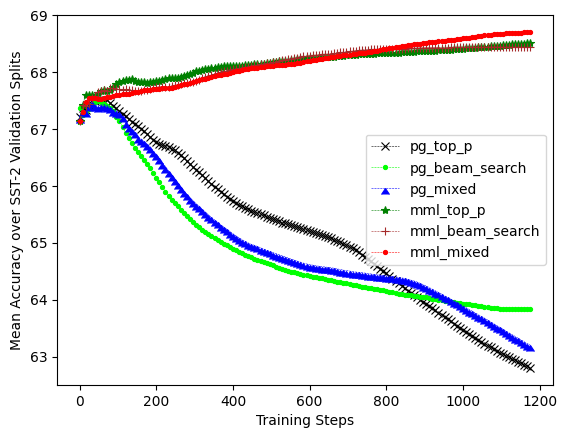

In [73]:
# comparison of tech decoding techniques.
fig = plt.figure()

experiments_to_see = [
    "top_p",
    "beam_search",
    "mixed",
]

local_colors = ["black", "lime", "blue", "green", 'brown', 'red', 'pink']
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--"]
markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]

for idx, exp in enumerate(experiments_to_see):
    avg_dims = ["pg_basic_on_policy", "pg_basic_off_policy", "pg_zscore_on_policy", "pg_zscore_off_policy"]
    means = 0.0
    for avg_dim in avg_dims:
        means += experiment_means[f"{avg_dim}_{exp}"]
    plt.plot(
        experiment_steps["pg_zscore_on_policy_beam_search"],
        means / 4.0,
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.4,
        label="pg_" + exp,
        linestyle=linestyles[idx],
        markeredgewidth=0.8,
    )

for idx, exp in enumerate(experiments_to_see):
    avg_dims = ["mml_basic_on_policy", "mml_basic_off_policy", "mml_zscore_on_policy", "mml_zscore_off_policy"]
    means = 0.0
    for avg_dim in avg_dims:
        means += experiment_means[f"{avg_dim}_{exp}"]
    plt.plot(
        experiment_steps["mml_basic_on_policy_beam_search"],
        means / 4.0,
        color=local_colors[idx + 3],
        marker=markers[idx + 3],
        linewidth=0.4,
        label="mml_" + exp,
        linestyle=linestyles[idx + 3],
        markeredgewidth=0.8,
    )
plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("decoding_methods_in_pg.svg", format="svg", dpi=1200)

pg_basic_on_policy_top_p 67.89
pg_basic_on_policy_beam_search 68.05
pg_basic_on_policy_mixed 67.89
pg_zscore_on_policy_top_p 71.33
pg_zscore_on_policy_beam_search 70.31
pg_zscore_on_policy_mixed 71.17
pg_basic_off_policy_top_p 68.59
pg_basic_off_policy_beam_search 68.44
pg_basic_off_policy_mixed 69.06
pg_zscore_off_policy_top_p 68.75
pg_zscore_off_policy_beam_search 68.67
pg_zscore_off_policy_mixed 68.05


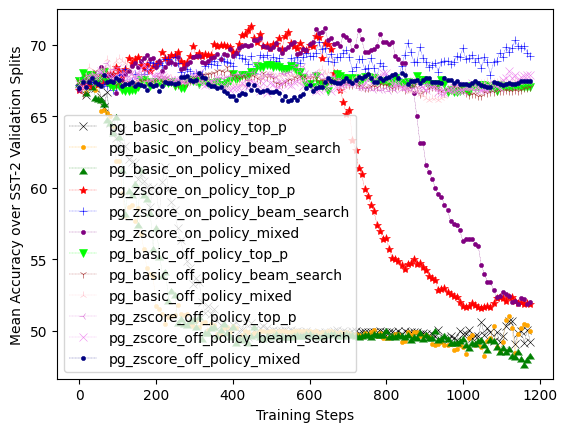

In [5]:
# which combination is good for pg.

fig = plt.figure()

experiments_to_see = [
    "pg_basic_on_policy_top_p",
    "pg_basic_on_policy_beam_search",
    "pg_basic_on_policy_mixed",
    "pg_zscore_on_policy_top_p",
    "pg_zscore_on_policy_beam_search",
    "pg_zscore_on_policy_mixed",
    "pg_basic_off_policy_top_p",
    "pg_basic_off_policy_beam_search",
    "pg_basic_off_policy_mixed",
    "pg_zscore_off_policy_top_p",
    "pg_zscore_off_policy_beam_search",
     "pg_zscore_off_policy_mixed",
]
local_colors = ["black", "orange", "green", "red", "blue", "purple", "lime", 'brown', "pink", "orchid", "violet", "navy"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--"]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    #print(exp, round(np.mean(experiment_means[exp]), 2))
    print(exp, round(max(experiment_means[exp]), 2))
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("pg_comparisons.svg", format="svg", dpi=1200)

In [11]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    "mml_basic_on_policy_top_p",
    "mml_basic_on_policy_beam_search",
    "mml_basic_on_policy_mixed",
    "mml_zscore_on_policy_top_p",
    "mml_zscore_on_policy_beam_search",
    "mml_zscore_on_policy_mixed",
    "mml_basic_off_policy_top_p",
    "mml_basic_off_policy_beam_search",
    "mml_basic_off_policy_mixed",
    "mml_zscore_off_policy_top_p",
    "mml_zscore_off_policy_beam_search",
    "mml_zscore_off_policy_mixed",
    "mml_basic_ppo_top_p",
    "mml_basic_ppo_beam_search",
    "mml_basic_ppo_mixed",
    "mml_zscore_ppo_top_p",
    "mml_zscore_ppo_beam_search",
    "mml_zscore_ppo_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_on_policy_beam_search",
    #"pg_basic_on_policy_mixed",
    #"pg_zscore_on_policy_top_p",
    #"pg_zscore_on_policy_beam_search",
    #"pg_zscore_on_policy_mixed",
    #"pg_basic_off_policy_top_p",
    #"pg_basic_off_policy_beam_search",
    #"pg_basic_off_policy_mixed",
    #"pg_zscore_off_policy_top_p",
    #"pg_zscore_off_policy_beam_search",
    #"pg_zscore_off_policy_mixed",
    #"pg_basic_ppo_top_p",
    #"pg_basic_ppo_beam_search",
    #"pg_basic_ppo_mixed",
    #"pg_zscore_ppo_top_p",
    #"pg_zscore_ppo_beam_search",
    #"pg_zscore_ppo_mixed",
    #"pg_zscore_on_policy_mixed",
    #"pg_zscore_off_policy_mixed",
    #"pg_basic_on_policy_mixed",
    #"pg_basic_off_policy_mixed",
    #"mml_basic_off_policy_top_p",
    #"mml_basic_off_policy_beam_search",
    #"mml_basic_off_policy_mixed",
    #"mml_zscore_off_policy_top_p",
    #"mml_zscore_off_policy_beam_search",
    #"mml_zscore_off_policy_mixed",
]
local_colors = ["green", "red", "blue", "orange", "blue", "purple", "lime", 'brown', "pink", "orchid", "violet", "navy"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--"]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    print(exp, round(np.mean(experiment_means[exp]), 1))
    #print(exp, round(max(experiment_means[exp]), 1))
    '''
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.3,
        linestyle=linestyles[idx],
    )
    '''

'''
plt.legend()
plt.xlabel("Training Steps (batch_size = 8)")
plt.ylabel("Mean Accuracy over Five SST-2 Validation Splits")

plt.show()
fig.savefig("ppo_divergence.svg", format="svg", dpi=1200)
'''

mml_basic_on_policy_top_p 68.5
mml_basic_on_policy_beam_search 67.6
mml_basic_on_policy_mixed 68.6
mml_zscore_on_policy_top_p 69.1
mml_zscore_on_policy_beam_search 68.9
mml_zscore_on_policy_mixed 69.1
mml_basic_off_policy_top_p 68.0
mml_basic_off_policy_beam_search 68.6
mml_basic_off_policy_mixed 68.4
mml_zscore_off_policy_top_p 68.3
mml_zscore_off_policy_beam_search 68.6
mml_zscore_off_policy_mixed 68.6
mml_basic_ppo_top_p 68.2
mml_basic_ppo_beam_search 69.0
mml_basic_ppo_mixed 68.9
mml_zscore_ppo_top_p 67.9
mml_zscore_ppo_beam_search 69.0
mml_zscore_ppo_mixed 68.9


'\nplt.legend()\nplt.xlabel("Training Steps (batch_size = 8)")\nplt.ylabel("Mean Accuracy over Five SST-2 Validation Splits")\n\nplt.show()\nfig.savefig("ppo_divergence.svg", format="svg", dpi=1200)\n'

<Figure size 640x480 with 0 Axes>

In [10]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    #"mml_basic_on_policy_top_p",
    #"mml_basic_on_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_zscore_on_policy_top_p",
    #"mml_zscore_on_policy_beam_search",
    #"mml_zscore_on_policy_mixed",
    #"mml_basic_off_policy_top_p",
    #"mml_basic_off_policy_beam_search",
    #"mml_basic_off_policy_mixed",
    #"mml_zscore_off_policy_top_p",
    #"mml_zscore_off_policy_beam_search",
    #"mml_zscore_off_policy_mixed",
    #"mml_basic_ppo_top_p",
    #"mml_basic_ppo_beam_search",
    #"mml_basic_ppo_mixed",
    #"mml_zscore_ppo_top_p",
    #"mml_zscore_ppo_beam_search",
    #"mml_zscore_ppo_mixed",
    "pg_basic_on_policy_top_p",
    "pg_basic_on_policy_beam_search",
    "pg_basic_on_policy_mixed",
    "pg_zscore_on_policy_top_p",
    "pg_zscore_on_policy_beam_search",
    "pg_zscore_on_policy_mixed",
    "pg_basic_off_policy_top_p",
    "pg_basic_off_policy_beam_search",
    "pg_basic_off_policy_mixed",
    "pg_zscore_off_policy_top_p",
    "pg_zscore_off_policy_beam_search",
    "pg_zscore_off_policy_mixed",
    "pg_basic_ppo_top_p",
    "pg_basic_ppo_beam_search",
    "pg_basic_ppo_mixed",
    "pg_zscore_ppo_top_p",
    "pg_zscore_ppo_beam_search",
    "pg_zscore_ppo_mixed",
    #"pg_zscore_on_policy_mixed",
    #"pg_zscore_off_policy_mixed",
    #"pg_basic_on_policy_mixed",
    #"pg_basic_off_policy_mixed",
    #"mml_basic_off_policy_top_p",
    #"mml_basic_off_policy_beam_search",
    #"mml_basic_off_policy_mixed",
    #"mml_zscore_off_policy_top_p",
    #"mml_zscore_off_policy_beam_search",
    #"mml_zscore_off_policy_mixed",
]
local_colors = ["green", "red", "blue", "orange", "blue", "purple", "lime", 'brown', "pink", "orchid", "violet", "navy"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--"]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    print(exp, round(np.mean(experiment_means[exp]), 1))
    #print(exp, round(max(experiment_means[exp]), 1))
    '''
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.3,
        linestyle=linestyles[idx],
    )
    '''

'''
plt.legend()
plt.xlabel("Training Steps (batch_size = 8)")
plt.ylabel("Mean Accuracy over Five SST-2 Validation Splits")

plt.show()
fig.savefig("ppo_divergence.svg", format="svg", dpi=1200)
'''

pg_basic_on_policy_top_p 53.2
pg_basic_on_policy_beam_search 52.0
pg_basic_on_policy_mixed 52.4
pg_zscore_on_policy_top_p 63.8
pg_zscore_on_policy_beam_search 68.6
pg_zscore_on_policy_mixed 66.6
pg_basic_off_policy_top_p 67.5
pg_basic_off_policy_beam_search 67.4
pg_basic_off_policy_mixed 67.5
pg_zscore_off_policy_top_p 67.5
pg_zscore_off_policy_beam_search 67.4
pg_zscore_off_policy_mixed 67.2
pg_basic_ppo_top_p 67.4
pg_basic_ppo_beam_search 67.4
pg_basic_ppo_mixed 68.2
pg_zscore_ppo_top_p 67.6
pg_zscore_ppo_beam_search 67.9
pg_zscore_ppo_mixed 68.7


'\nplt.legend()\nplt.xlabel("Training Steps (batch_size = 8)")\nplt.ylabel("Mean Accuracy over Five SST-2 Validation Splits")\n\nplt.show()\nfig.savefig("ppo_divergence.svg", format="svg", dpi=1200)\n'

<Figure size 640x480 with 0 Axes>

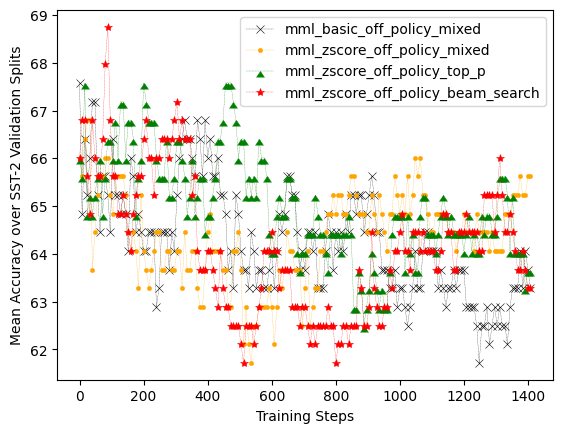

In [37]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"mml_zscore_on_policy_top_p",
    #"mml_zscore_on_policy_mixed",
    #"mml_zscore_on_policy_beam_search",
    #"mml_zscore_on_policy_top_p",
    #"mml_zscore_on_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_beam_search",
    #"mml_zscore_off_policy_mixed",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    "mml_basic_off_policy_mixed",
    "mml_zscore_off_policy_mixed",
    #"mml_basic_on_policy_top_p",
    "mml_zscore_off_policy_top_p",
    #"mml_basic_on_policy_beam_search",
    "mml_zscore_off_policy_beam_search",
    #"pg_basic_on_policy_mixed",
    #"pg_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_off_policy_top_p",
    #"pg_basic_on_policy_beam_search",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_on_policy_mixed",
    #"pg_zscore_on_policy_beam_search",
]
local_colors = ["black", "orange", "green", "red", "blue", "purple", "lime", 'brown', "pink", "orchid", "violet", "navy"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--"]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

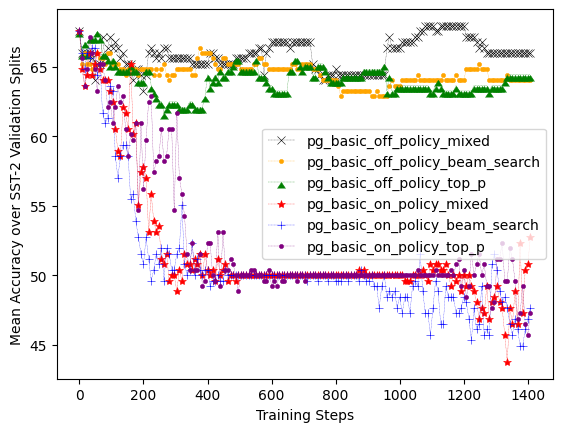

In [38]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    
    #"mml_basic_off_policy_mixed",
    #"mml_basic_off_policy_beam_search",
    #"mml_basic_off_policy_top_p",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_on_policy_beam_search",
    #"mml_basic_on_policy_top_p",
    "pg_basic_off_policy_mixed",
    "pg_basic_off_policy_beam_search",
    "pg_basic_off_policy_top_p",
    "pg_basic_on_policy_mixed",
    "pg_basic_on_policy_beam_search",
    "pg_basic_on_policy_top_p",
    #"mml_zscore_on_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_beam_search",
    #"mml_zscore_off_policy_mixed",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_mixed",
    #"mml_basic_on_policy_top_p",
    #"mml_zscore_on_policy_top_p",
    #"mml_basic_on_policy_beam_search",
    #"mml_zscore_on_policy_beam_search",
    #"pg_basic_on_policy_mixed",
    #"pg_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_off_policy_top_p",
    #"pg_basic_on_policy_beam_search",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_on_policy_mixed",
    #"pg_zscore_on_policy_beam_search",
]
local_colors = ["black", "orange", "green", "red", "blue", "purple", "lime", 'brown', "pink", "orchid", "violet", "navy"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--"]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

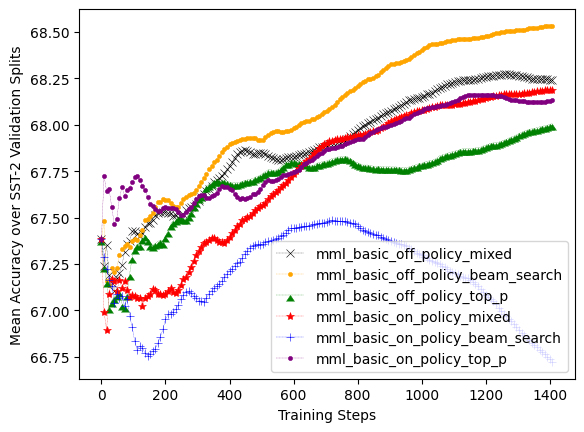

In [16]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    
    "mml_basic_off_policy_mixed",
    "mml_basic_off_policy_beam_search",
    "mml_basic_off_policy_top_p",
    "mml_basic_on_policy_mixed",
    "mml_basic_on_policy_beam_search",
    "mml_basic_on_policy_top_p",
    #"pg_basic_off_policy_beam_search",
    #"pg_zscore_off_policy_mixed",
    #"pg_zscore_off_policy_beam_search",
    #"pg_zscore_off_policy_top_p",
    #"pg_zscore_on_policy_mixed",
    #"pg_zscore_on_policy_beam_search",
    #"pg_zscore_on_policy_top_p",
    #"mml_zscore_on_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_beam_search",
    #"mml_zscore_off_policy_mixed",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_mixed",
    #"mml_basic_on_policy_top_p",
    #"mml_zscore_on_policy_top_p",
    #"mml_basic_on_policy_beam_search",
    #"mml_zscore_on_policy_beam_search",
    #"pg_basic_on_policy_mixed",
    #"pg_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_off_policy_top_p",
    #"pg_basic_on_policy_beam_search",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_on_policy_mixed",
    #"pg_zscore_on_policy_beam_search",
]
local_colors = ["black", "orange", "green", "red", "blue", "purple", "lime", 'brown', "pink", "orchid", "violet", "navy"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--"]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

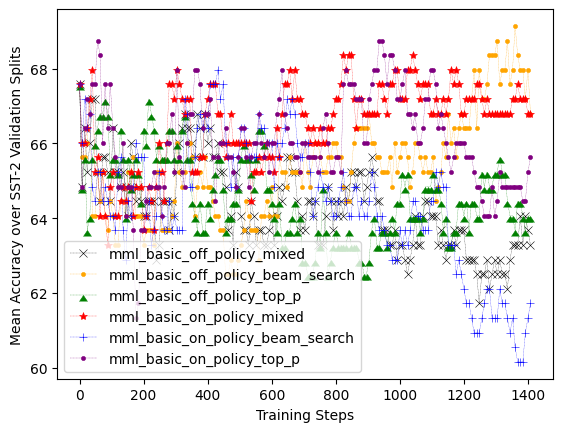

In [28]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    "mml_basic_off_policy_mixed",
    "mml_basic_off_policy_beam_search",
    "mml_basic_off_policy_top_p",
    "mml_basic_on_policy_mixed",
    "mml_basic_on_policy_beam_search",
    "mml_basic_on_policy_top_p",
    #"pg_basic_off_policy_mixed",
    #"pg_basic_off_policy_beam_search",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_off_policy_top_p",
    #"pg_basic_on_policy_mixed",
    #"pg_basic_on_policy_beam_search",
    #"pg_basic_on_policy_top_p",
    #"mml_zscore_on_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_beam_search",
    #"mml_zscore_off_policy_mixed",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_mixed",
    #"mml_basic_on_policy_top_p",
    #"mml_zscore_on_policy_top_p",
    #"mml_basic_on_policy_beam_search",
    #"mml_zscore_on_policy_beam_search",
    #"pg_basic_on_policy_mixed",
    #"pg_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_off_policy_top_p",
    #"pg_basic_on_policy_beam_search",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_on_policy_mixed",
    #"pg_zscore_on_policy_beam_search",
]
local_colors = ["black", "orange", "green", "red", "blue", "purple", "lime", 'brown', "pink", "orchid", "violet", "navy"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--"]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

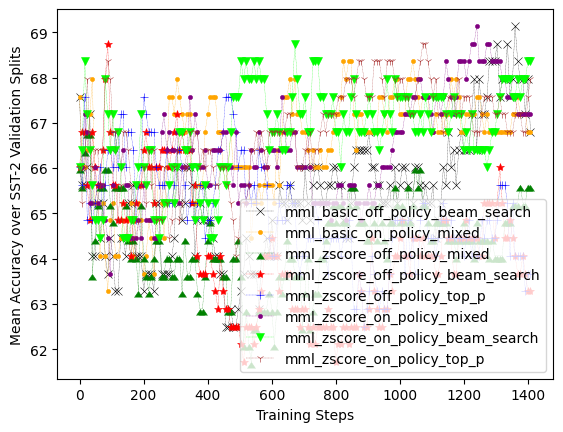

In [30]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    
    #"mml_basic_off_policy_mixed",
    #"mml_basic_off_policy_beam_search",
    #"mml_basic_off_policy_top_p",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_on_policy_beam_search",
    #"mml_basic_on_policy_top_p",
    "mml_basic_off_policy_beam_search",
    "mml_basic_on_policy_mixed",
    "mml_zscore_off_policy_mixed",
    "mml_zscore_off_policy_beam_search",
    "mml_zscore_off_policy_top_p",
    "mml_zscore_on_policy_mixed",
    "mml_zscore_on_policy_beam_search",
    "mml_zscore_on_policy_top_p",
    #"mml_zscore_on_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_beam_search",
    #"mml_zscore_off_policy_mixed",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_mixed",
    #"mml_basic_on_policy_top_p",
    #"mml_zscore_on_policy_top_p",
    #"mml_basic_on_policy_beam_search",
    #"mml_zscore_on_policy_beam_search",
    #"pg_basic_on_policy_mixed",
    #"pg_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_off_policy_top_p",
    #"pg_basic_on_policy_beam_search",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_on_policy_mixed",
    #"pg_zscore_on_policy_beam_search",
]
local_colors = ["black", "orange", "green", "red", "blue", "purple", "lime", 'brown', "pink", "orchid", "violet", "navy"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--"]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

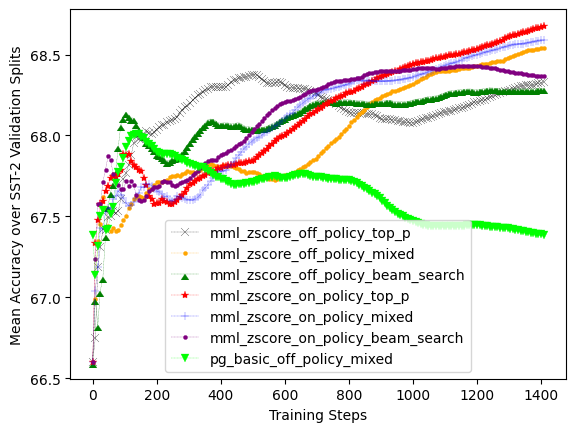

In [19]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    
    #"mml_basic_off_policy_mixed",
    #"mml_basic_off_policy_beam_search",
    #"mml_basic_off_policy_top_p",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_on_policy_beam_search",
    #"mml_basic_on_policy_top_p",
    #"pg_zscore_off_policy_mixed",
    #"pg_zscore_off_policy_beam_search",
    #"pg_zscore_off_policy_top_p",
    #"pg_zscore_on_policy_mixed",
    #"pg_zscore_on_policy_beam_search",
    #"pg_zscore_on_policy_top_p",
    "mml_zscore_off_policy_top_p",
    "mml_zscore_off_policy_mixed",
    "mml_zscore_off_policy_beam_search",
    "mml_zscore_on_policy_top_p",
    "mml_zscore_on_policy_mixed",
    "mml_zscore_on_policy_beam_search",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_beam_search",
    #"mml_zscore_off_policy_mixed",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_mixed",
    #"mml_basic_on_policy_top_p",
    #"mml_zscore_on_policy_top_p",
    #"mml_basic_on_policy_beam_search",
    #"mml_zscore_on_policy_beam_search",
    #"pg_basic_on_policy_mixed",
    "pg_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_off_policy_top_p",
    #"pg_basic_on_policy_beam_search",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_on_policy_mixed",
    #"pg_zscore_on_policy_beam_search",
]
local_colors = ["black", "orange", "green", "red", "blue", "purple", "lime", 'brown', "pink", "orchid", "violet", "navy"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--"]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.2,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

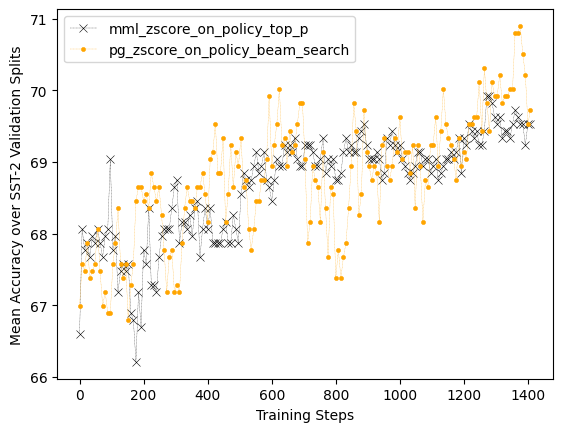

In [26]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    #"mml_basic_off_policy_mixed",
    #"mml_basic_on_policy_mixed",
    #"pg_basic_off_policy_mixed",
    #"pg_zscore_on_policy_mixed",
    #"mml_basic_on_policy_top_p",
    #"mml_basic_off_policy_top_p",
    #"mml_basic_on_policy_beam_search",
    #"mml_basic_off_policy_beam_search",
    #"pg_basic_off_policy_mixed",
    #"pg_basic_off_policy_top_p",
    #"pg_basic_off_policy_beam_search",
    #"pg_basic_on_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_on_policy_beam_search",
    #"mml_zscore_on_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_beam_search",
    #"mml_zscore_off_policy_mixed",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_mixed",
    #"mml_basic_on_policy_top_p",
    "mml_zscore_on_policy_top_p",
    #"mml_basic_on_policy_beam_search",
    #"mml_zscore_on_policy_beam_search",
    #"pg_zscore_on_policy_mixed",
    #"pg_zscore_off_policy_mixed",
    #"pg_zscore_on_policy_top_p",
    #"pg_zscore_off_policy_top_p",
    "pg_zscore_on_policy_beam_search",
    #"pg_zscore_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_on_policy_mixed",
    #"pg_zscore_on_policy_beam_search",
]
local_colors = ["black", "orange", "green", "red", "blue", "purple", "lime", 'brown', "pink", "orchid", "violet", "navy"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--"]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

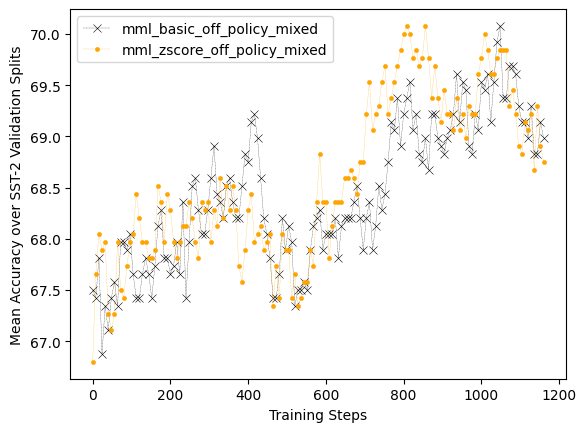

In [209]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    "mml_basic_off_policy_mixed",
    "mml_zscore_off_policy_mixed",
    #"mml_basic_on_policy_top_p",
    #"mml_basic_off_policy_top_p",
    #"mml_basic_on_policy_beam_search",
    #"mml_basic_off_policy_beam_search",
    #"pg_basic_off_policy_mixed",
    #"pg_basic_off_policy_top_p",
    #"pg_basic_off_policy_beam_search",
    #"pg_basic_on_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_on_policy_beam_search",
    #"mml_zscore_on_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_beam_search",
    #"mml_zscore_off_policy_mixed",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_mixed",
    #"mml_basic_on_policy_top_p",
    "mml_zscore_on_policy_top_p",
    #"mml_basic_on_policy_beam_search",
    #"mml_zscore_on_policy_beam_search",
    #"pg_basic_on_policy_mixed",
    #"pg_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_off_policy_top_p",
    #"pg_basic_on_policy_beam_search",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_on_policy_mixed",
    #"pg_zscore_on_policy_beam_search",
]
local_colors = ["black", "orange", "green", "red", "blue", "purple", "lime", 'brown', "pink", "orchid", "violet", "navy"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--"]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

ValueError: x and y must have same first dimension, but have shapes (5, 147) and (100,)

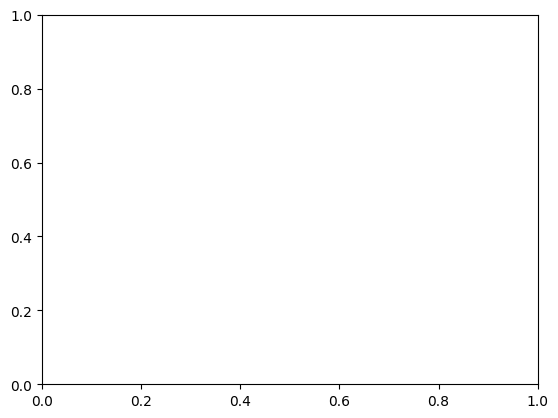

In [221]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    "pg_basic_off_policy_mixed",
    "pg_zscore_off_policy_mixed",
    #"mml_basic_on_policy_top_p",
    #"mml_basic_off_policy_top_p",
    #"mml_basic_on_policy_beam_search",
    #"mml_basic_off_policy_beam_search",
    #"pg_basic_off_policy_mixed",
    #"pg_basic_off_policy_top_p",
    #"pg_basic_off_policy_beam_search",
    #"pg_basic_on_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_on_policy_beam_search",
    #"mml_zscore_on_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_beam_search",
    #"mml_zscore_off_policy_mixed",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"mml_zscore_off_policy_mixed",
    #"mml_zscore_on_policy_mixed",
    #"mml_basic_on_policy_top_p",
    #"mml_zscore_on_policy_top_p",
    #"mml_basic_on_policy_beam_search",
    #"mml_zscore_on_policy_beam_search",
    #"pg_basic_on_policy_mixed",
    #"pg_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_off_policy_top_p",
    #"pg_basic_on_policy_beam_search",
    #"pg_basic_off_policy_beam_search",
    #"mml_basic_on_policy_mixed",
    #"mml_basic_off_policy_mixed",
    #"pg_basic_on_policy_top_p",
    #"pg_basic_on_policy_mixed",
    #"pg_zscore_on_policy_beam_search",
]
local_colors = ["black", "orange", "green", "red", "blue", "purple", "lime", 'brown', "pink", "orchid", "violet", "navy"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--", "--"]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)